## Text classification on LeMonde2003 Dataset

In this notebook, we
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*.

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory :

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ?
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [10]:
import pandas as pd

# load dataframe from CSV file
# YOUR CODE HERE
data = pd.read_csv("/content/drive/MyDrive/ENSAE/NLP/LeMonde2003_9classes.csv")

In [11]:
n = len(data)

print(f"Il y a {n} articles")

Il y a 13054 articles


<Axes: xlabel='count', ylabel='category'>

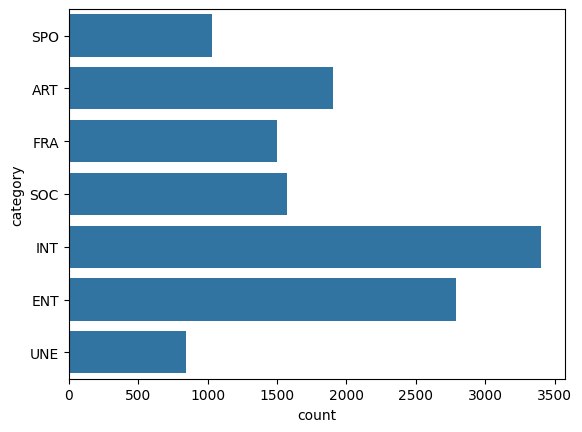

In [12]:
import seaborn as sns
%matplotlib inline
import matplotlib as plt

sns.countplot(data=data, y = 'category')

# Plot the statistics of category
# YOUR CODE HERE

In [13]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
# YOUR CODE HERE

data.sample(2)


,text,category
12396,les éthers de glycol sont connus depuis les années 1930 mais leur utilisation massive date des années 1970 le premier avis d'alerte comme toxique sévère de la reproduction et du sang a été lancé en mai 1982 par l'etat de californie dès 1990 la suède a interdit certains éthers de glycol en octobre 1993 l'union européenne a classé quatre éthers comme toxiques pour la reproduction trois autres éthers ont été classés depuis dans la même catégorie leur utilisation doit être accompagnée des mentions peut altérer la fertilité et risque pendant la grossesse d'effets néfastes pour l'enfant en france la première réglementation date de 1997 d'autres arrêtés ont suivi restreignant les usages pour certains éthers de la série e. mais aucune mesure d'interdiction complète n'a été prononcée notamment pour les usages industriels en novembre 2000 la commission de la sécurité des consommateurs souhaitait la substitution complète à brève échéance des éthers de glycol de la série e. en décembre 2002 le conseil supérieur d'hygiène publique de france cshpf se prononçait pour l'interdiction de sept éthers,SOC
6460,a trois semaines de la réunion du g 8 à evian où le président george bush rencontrera ses principaux partenaires européens les querelles commerciales qui opposent l'union européenne aux etats-unis connaissent une nouvelle escalade réunis en grèce ce week-end pour discuter de la réforme de la politique agricole commune dans la perspective du nouveau cycle de négociations en cours sur le commerce international les ministres de l'agriculture des quinze étaient confrontés à un nouvel ultimatum américain il porte cette fois sur les ogm un haut responsable américain cité anonymement par une agence de presse avait indiqué jeudi 8 mai que washington allait prochainement déposer une plainte devant l'omc à propos du moratoire sur les importations de produits contenant des organismes génétiquement modifiés ogm imposé depuis 1999 par sept pays européens cette menace intervient au lendemain de l'échec subi par les etats-unis à l'omc en raison de leur refus d'abroger la loi sur les sociétés de vente à l'étranger fsc foreign sales corporation laquelle fait bénéficier les entreprises américaines d'importantes subventions à l'exportation mercredi 7 mai l'organisation mondiale du commerce a accepté la liste des produits américains que l'union européenne se propose de surtaxer jusqu'à 100 au titre des sanctions contre les etats-unis pascal lamy commissaire européen au commerce a accompagné le verdict de l'organisation de genève d'un avertissement si l'administration américaine ne s'est pas exécutée à l'automne l'ue n'hésitera plus à utiliser sa bombe atomique commerciale une épreuve de force entre européens et américains ne peut que contribuer à compliquer les discussions sur les grands dossiers du cycle de doha l'agriculture les services l'accès des pays en développement aux médicaments pour lutter contre le sida la malaria et la tuberculose cela inquiète supachai panitchpakdi le directeur général de l'omc qui craint que la priorité arrêtée à doha en faveur des pays en développement ne fasse les frais de cette épreuve de force afp reuters,INT


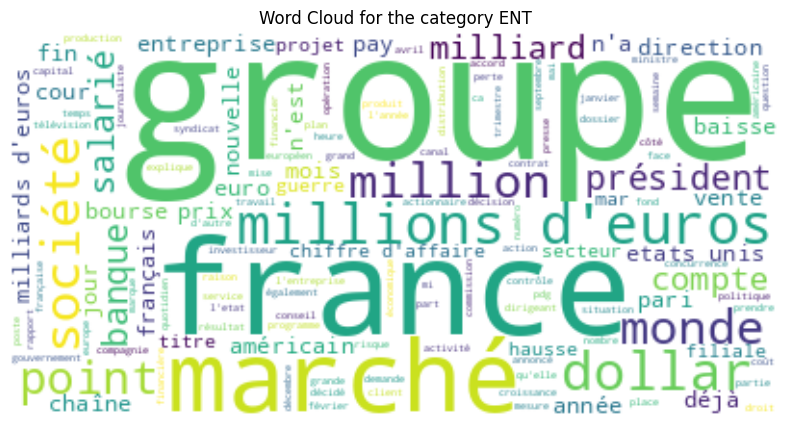

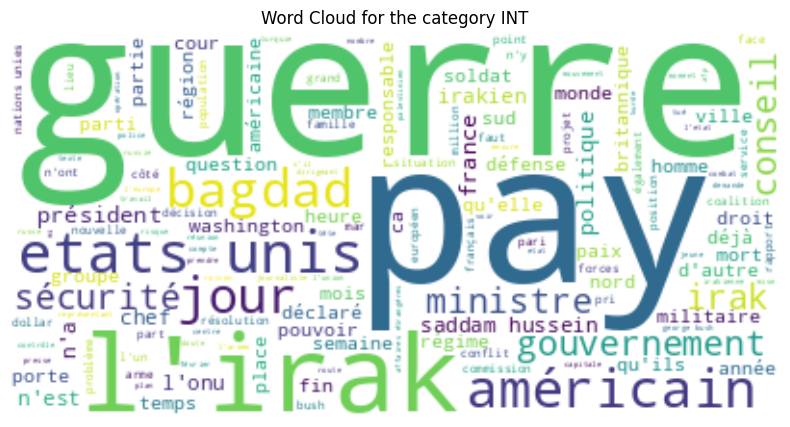

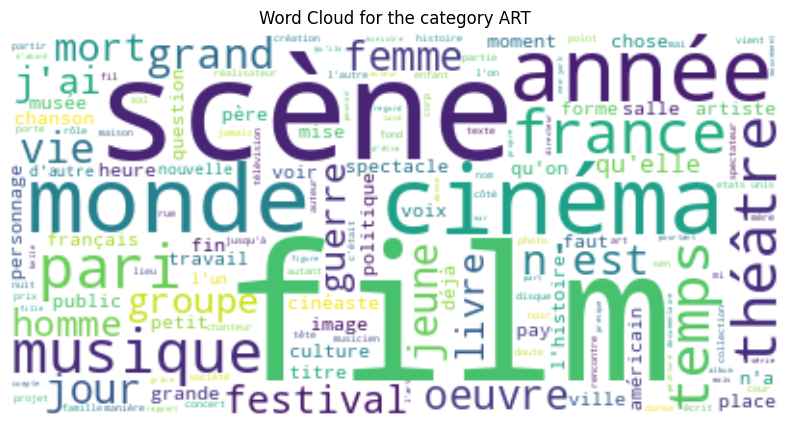

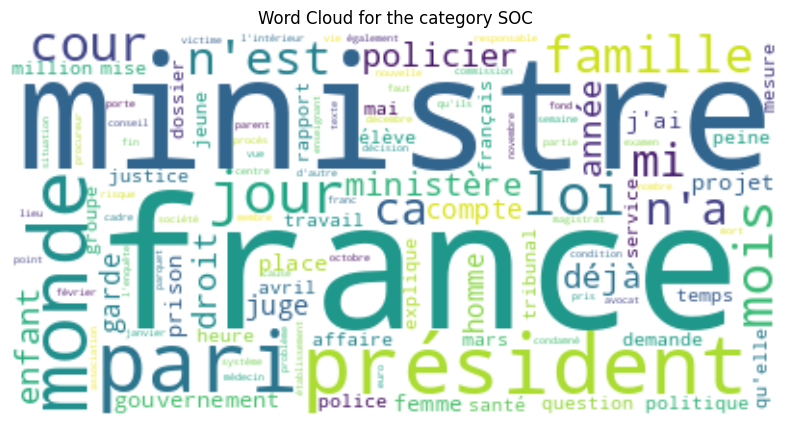

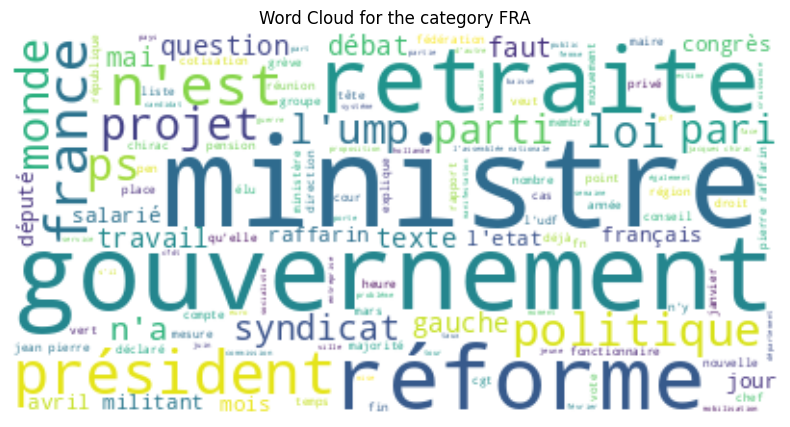

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

STOPWORDS = [x.strip() for x in open('/content/drive/MyDrive/ENSAE/NLP/stop_word_fr.txt', encoding="UTF-8").readlines()]

# Plot a word cloud for each category
for cat in ['ENT', 'INT', 'ART', 'SOC', 'FRA']:
    # Filter the dataframe for the current category
    filtered_data = data[data['category'] == cat]
    # Combine all texts of this category into a single string
    combined_texts = " ".join(text for text in filtered_data['text'])
    # Create the WordCloud
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(combined_texts)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for the category {cat}")
    plt.show()


## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple :

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words :

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words.
> * Train a naive bayes classifier on the data.
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [30]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
# YOUR CODE HERE
data['text'] = data['text'].fillna('')
data.dropna(subset=['category'], inplace=True)

X_train, X_temp, y_train, y_temp = train_test_split(data['text'], data['category'], test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)
# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)
X_test_counts = vectorizer.transform(X_test)

In [32]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
nb_classifier = MultinomialNB()

# Train
nb_classifier.fit(X_train_counts, y_train)

# Evaluate
train_accuracy = nb_classifier.score(X_train_counts, y_train)
dev_accuracy = nb_classifier.score(X_dev_counts, y_dev)
test_accuracy = nb_classifier.score(X_test_counts, y_test)

print(f"Accuracy on training set: {train_accuracy}")
print(f"Accuracy on development set: {dev_accuracy}")
print(f"Accuracy on test set: {test_accuracy}")


Accuracy on training set: 0.740566941199004
Accuracy on development set: 0.7057471264367816
Accuracy on test set: 0.7182235834609495


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)

**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

max_words = [200,1000,2000,5000,10000,20000,50000]

for i in max_words :

    vectorizer = CountVectorizer(max_features=i)

    # fit on train data
    vectorizer.fit(X_train)
    # apply it on train and dev data
    X_train_counts = vectorizer.transform(X_train)
    X_dev_counts = vectorizer.transform(X_dev)
    X_test_counts = vectorizer.transform(X_test)

    tf_transformer = TfidfTransformer().fit(X_train_counts)

    X_train_tf = tf_transformer.transform(X_train_counts)
    X_test_tf = tf_transformer.transform(X_test_counts)
    X_dev_tf = tf_transformer.transform(X_dev_counts)

    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_tf, y_train)

    train_accuracy = nb_classifier.score(X_train_tf, y_train)
    dev_accuracy = nb_classifier.score(X_dev_tf, y_dev)

    train_error_rate = 1 - train_accuracy
    dev_error_rate = 1 - dev_accuracy

    #print(f"Error rate on training set with {i} features: {train_error_rate}")
    print(f"Error rate on dev set with {i} features: {dev_error_rate}")

Error rate on dev set with 200 features: 0.485823754789272
Error rate on dev set with 1000 features: 0.271264367816092
Error rate on dev set with 2000 features: 0.2360153256704981
Error rate on dev set with 5000 features: 0.20996168582375474
Error rate on dev set with 10000 features: 0.19999999999999996
Error rate on dev set with 20000 features: 0.23754789272030652
Error rate on dev set with 50000 features: 0.3708812260536398


Selon nos essais, un mf beaucoup plus grand comme 10000  est plus adapté que les 1000 initialement envisagés

## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used :

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


Classification Report:
               precision    recall  f1-score   support

         ART       0.89      0.81      0.85       176
         ENT       0.85      0.87      0.86       292
         FRA       0.68      0.34      0.45       133
         INT       0.47      0.99      0.64       344
         SOC       0.85      0.15      0.25       151
         SPO       0.83      0.28      0.42       107
         UNE       0.00      0.00      0.00       103

    accuracy                           0.64      1306
   macro avg       0.65      0.49      0.49      1306
weighted avg       0.67      0.64      0.58      1306



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


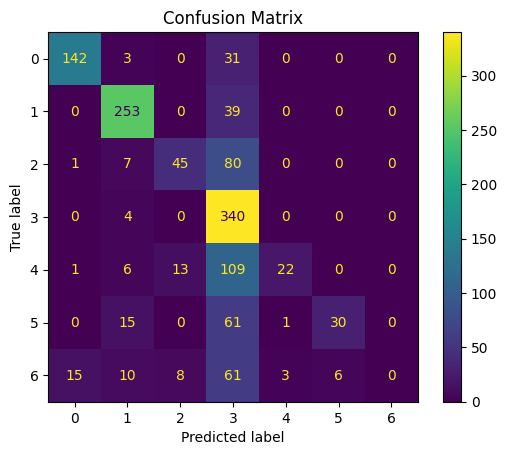

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prédire les étiquettes sur l'ensemble de test
y_pred = nb_classifier.predict(X_test_tf)

# Rapport de classification
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()


## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

<ipython-input-38-b4ac75ae9946>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['category'] = data_filtered['category'].replace({'FRANCE': 'FRANCE_SOCIETE', 'SOCIETE': 'FRANCE_SOCIETE'})


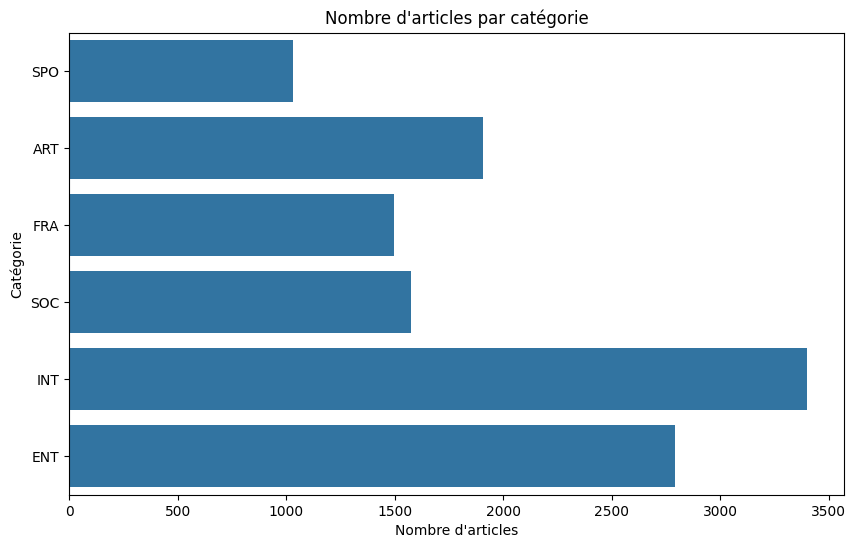

Training set size: 9765
Development set size: 1221
Test set size: 1221
Accuracy on training set: 0.8069636456733231
Accuracy on development set: 0.7927927927927928
Accuracy on test set: 0.7895167895167895


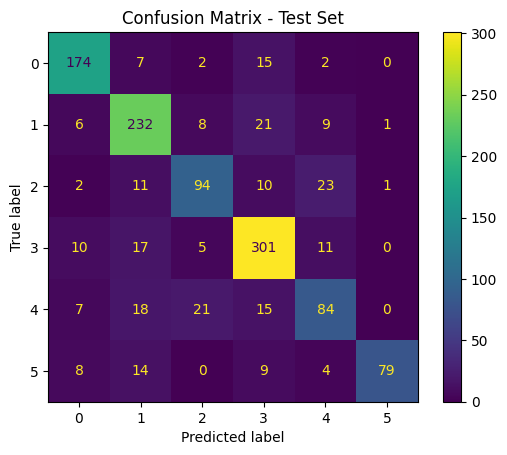

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE


import pandas as pd

# Supprimer les lignes appartenant à la classe 'UNE'
data_filtered = data[data['category'] != 'UNE']
# Fusionner les classes 'FRANCE' et 'SOCIETE' en une nouvelle classe 'FRANCE_SOCIETE'
data_filtered['category'] = data_filtered['category'].replace({'FRANCE': 'FRANCE_SOCIETE', 'SOCIETE': 'FRANCE_SOCIETE'})
# Plot the statistics of classes

plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data_filtered)
plt.title('Nombre d\'articles par catégorie')
plt.xlabel('Nombre d\'articles')
plt.ylabel('Catégorie')
plt.show()

# Make the splits and print the sizes for checking

X = data_filtered['text']
y = data_filtered['category']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Afficher les tailles pour vérification
print(f"Training set size: {X_train.shape[0]}")
print(f"Development set size: {X_dev.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Apply TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)
X_train_tf = tfidf_vect.fit_transform(X_train)
X_dev_tf = tfidf_vect.transform(X_dev)
X_test_tf = tfidf_vect.transform(X_test)

# Entraîner MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tf, y_train)

# Évaluer l'exactitude
train_accuracy = nb_classifier.score(X_train_tf, y_train)
dev_accuracy = nb_classifier.score(X_dev_tf, y_dev)
test_accuracy = nb_classifier.score(X_test_tf, y_test)

print(f"Accuracy on training set: {train_accuracy}")
print(f"Accuracy on development set: {dev_accuracy}")
print(f"Accuracy on test set: {test_accuracy}")

y_pred = nb_classifier.predict(X_test_tf)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - Test Set')
plt.show()



## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification).

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [39]:
from transformers import pipeline

# Initialiser la pipeline de classification zero-shot avec le modèle choisi
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

candidate_labels = ["entreprise", "international", "art", "société", "France", "sport", "livre", "télévision", "première page"]

label_mapping = {
    "entreprise": "ENT",
    "international": "INT",
    "art": "ART",
    "société": "SOC",
    "France": "FRA",
    "sport": "SPO",
    "livre": "LIV",
    "télévision": "TEL",
    "première page": "UNE"
}

text_example = data['text'][9]

# Classification de l'exemple de texte
result_example = classifier(text_example, candidate_labels)

# Affichage du résultat
print(text_example)
print("Classification de l'exemple de texte:", result_example['labels'][0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

des dizaines de milliers de personnes fuyant les villes de kirkouk et bagdad se trouvaient déjà mercredi 19 mars dans la partie du kurdistan irakien qui échappe au contrôle de bagdad quelque 30 000 personnes sont passées dans les zones contrôlées depuis 1991 par l'union patriotique kurde upk de jalal talabani tandis que plusieurs milliers d'autres se sont rendus dans les zones sous contrôle du parti démocratique kurde pdk de massoud barzani la plupart de ces déplacés sont des kurdes venant de la ville pétrolière de kirkouk pour les quelques employés humanitaires encore sur place cet exode des villes du nord comme kirkouk crée une situation humanitaire potentiellement explosive et constitue une urgence que l'onu n'a pas anticipée c'est une situation d'urgence et ces personnes ne reçoivent aucune assistance en matière de vivres de logement et de soins médicaux a déclaré steve priestly de l'association humanitaire britannique mines advisory group mag afp
Classification de l'exemple de tex

In [40]:
sample_data = data.sample(n=100, random_state=42)

candidate_labels = ["entreprise", "international", "art", "société", "France", "sport", "livre", "télévision", "première page"]

label_mapping = {
    "entreprise": "ENT",
    "international": "INT",
    "art": "ART",
    "société": "SOC",
    "France": "FRA",
    "sport": "SPO",
    "livre": "LIV",
    "télévision": "TEL",
    "première page": "UNE"
}

results = []

for index, row in sample_data.iterrows():
    text = row['text']
    true_label = row['category']
    prediction = classifier(text, candidate_labels)
    predicted_label = label_mapping[prediction['labels'][0]]
    results.append((true_label, predicted_label))

# Calculer l'exactitude
correct_predictions = sum(1 for true_label, predicted_label in results if true_label == predicted_label)
accuracy = correct_predictions / len(results)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 20.00%
